In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
Veri_Seti3_201701_In = pd.read_csv('./Dataset 3/Veri_Seti3_201701_In.csv')

In [3]:
pd.DataFrame(Veri_Seti3_201701_In, index = [0,1,2,3,4])

,CALLER_ID,TIMESTAMP,ID,CITY_ID
0,1100144895,02-01-2017 12:52,568,7
1,1100144895,02-01-2017 20:40,568,7
2,1100144895,02-01-2017 21:41,568,7
3,1100144895,03-01-2017 14:57,828,7
4,1100144895,05-01-2017 10:01,568,7


## Extract information from January dataset

In [4]:
JanuaryIn = np.asarray(Veri_Seti3_201701_In)

In [5]:
length, width = JanuaryIn.shape

In [6]:
print ('there are {} calls recorded in this dataset'.format(length))

there are 998625 calls recorded in this dataset


### Extract timestamp

In [7]:
timestamp = []
for i in range(length):
    timestamp.append(JanuaryIn[i,1].split())

In [8]:
timestamp = np.asarray(timestamp)

Extract date

In [31]:
date = timestamp[:,0]
day_month = []
for i in date:
    day_month.append(i[0]+i[1]+i[3]+i[4])

day_month = np.asarray(day_month)

Extract hours

In [9]:
time = timestamp[:,1]
hours = []
for i in time:
    hours.append(i[0]+i[1])

hours = np.asarray(hours)
hours = hours.astype(int)

### Extract called ID

In [10]:
callerID = JanuaryIn[:,0]

In [11]:
callerID = callerID.astype(str)

### Extract prefix

In [12]:
prefix = []
for i in callerID:
    prefix.append(i[0])

prefix = np.asarray(prefix)
prefix = prefix.astype(int)

In [13]:
unique, counts = np.unique(prefix, return_counts=True)
print ('there are {} refugee calls in this dataset'.format(counts[1]))

there are 758728 refugee calls in this dataset


### Extract city ID

In [14]:
cityID = JanuaryIn[:,3]

## Analyse data

In [15]:
to_analyse = [] #narrow down the callerIDs to analyse based on prefix
for i in range(len(callerID)):
    if prefix[i] == 2:
        if callerID[i] not in to_analyse:
                to_analyse.append(callerID[i])

In [16]:
to_analyse = np.asarray(to_analyse)

In [17]:
assert np.unique(to_analyse).shape == to_analyse.shape

In [33]:
evening_location = [] #find the cities refugees are in in the evening
for i in to_analyse:
    location = np.where(callerID == i)
    location = np.asarray(location)
    location = location.reshape(-1)
    dates = []
    cities = []
    for j in location:
        if hours[j] >= 18 or hours[j] <= 7:
            dates.append(day_month[j])
            cities.append(cityID[j])
    evening_location.append(i)
    evening_location.append(cities)
    evening_location.append(dates)

Save evening_locations file

In [34]:
with open("evening_location.txt", "wb") as fp:   #Pickling
    pickle.dump(evening_location, fp)

In [35]:
with open("evening_location.txt", "rb") as fp:   # Unpickling
    evening_location = pickle.load(fp)

In [45]:
to_plot = [] #find the refugees who spend their time in more that one city in the evening over the month
i = 1
while i < len(evening_location):
    unique, counts = np.unique(evening_location[i], return_counts=True)
    if len(unique) > 1:
        to_plot.append(evening_location[i-1])
        to_plot.append(evening_location[i])
        to_plot.append(evening_location[i+1])
    i += 3

In [75]:
print ('there are {} callers out ot 50,000 refugees who moved cities'.format(len(to_plot)/3))

there are 1159 callers out ot 50,000 refugees who moved cities


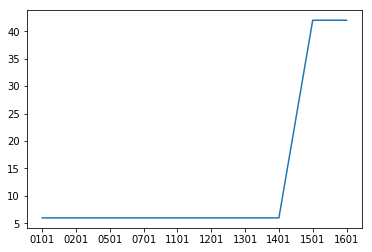

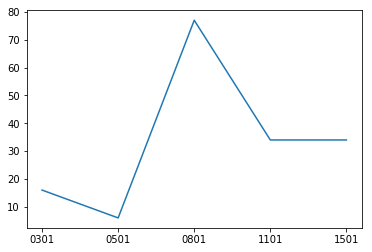

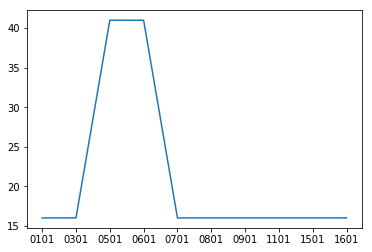

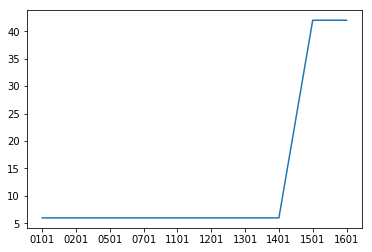

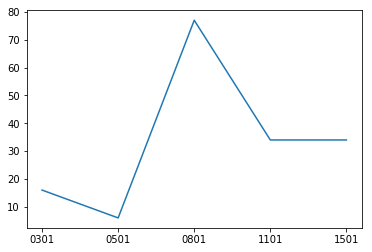

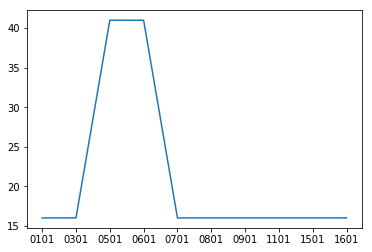

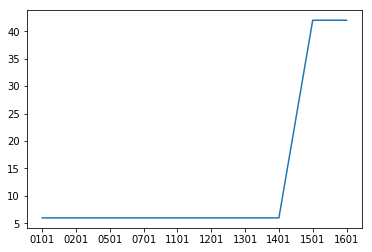

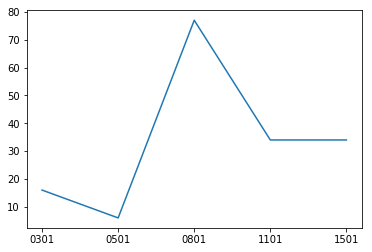

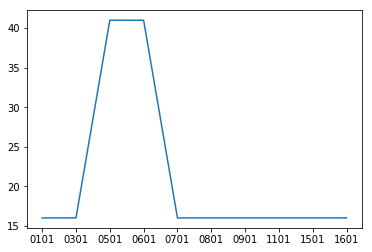

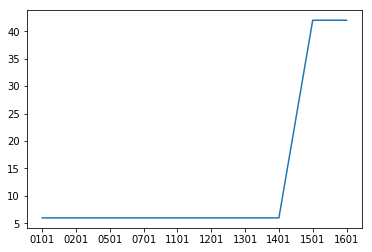

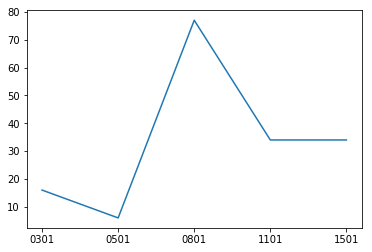

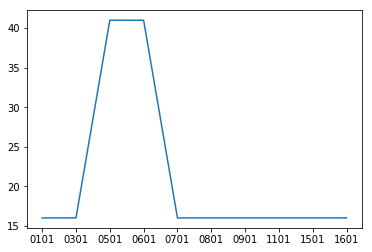

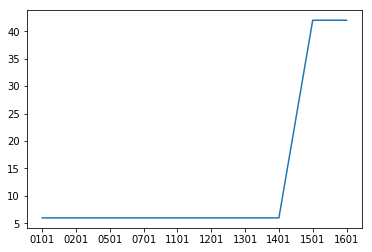

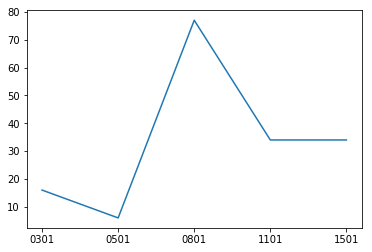

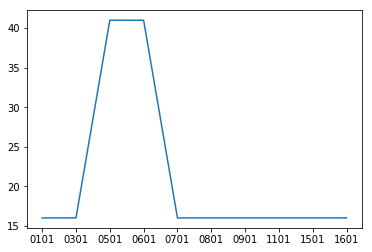

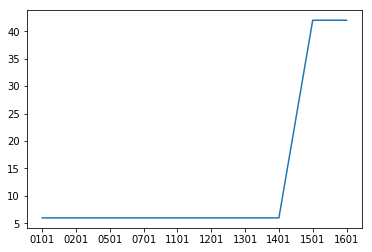

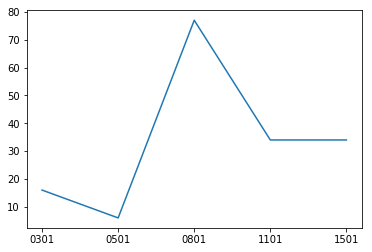

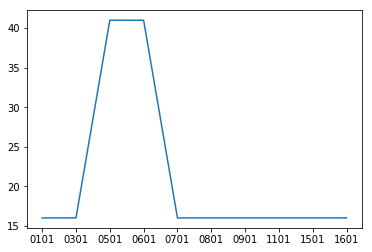

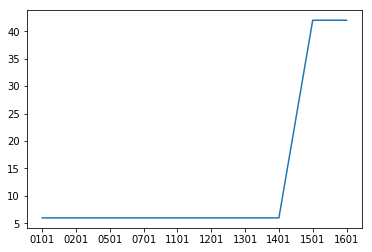

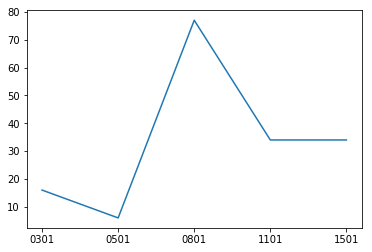

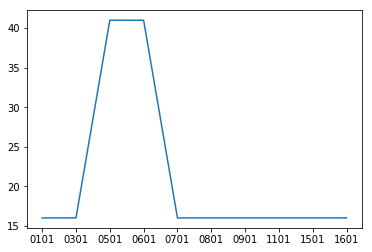

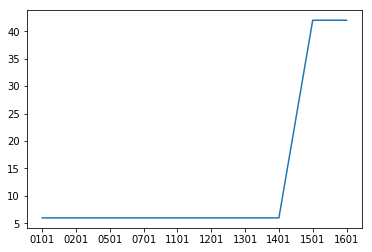

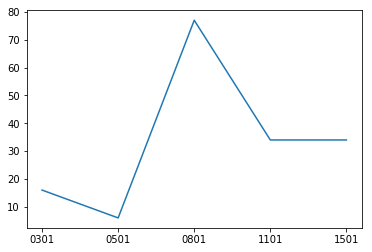

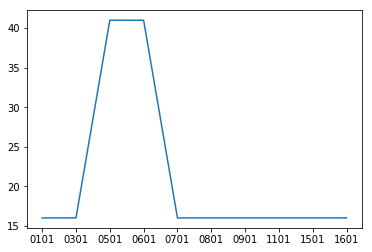

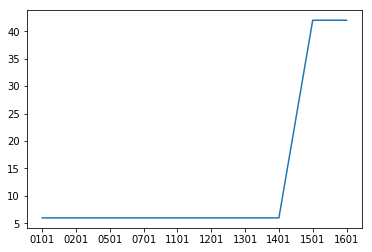

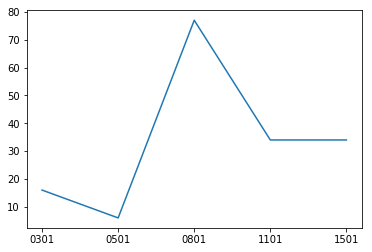

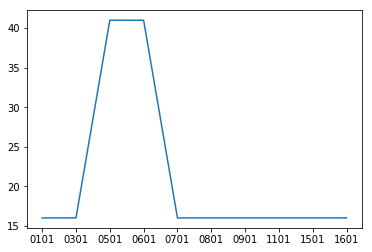

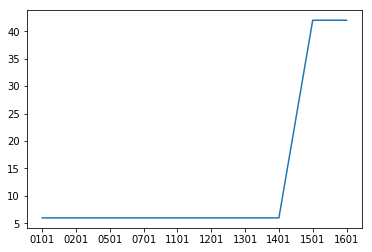

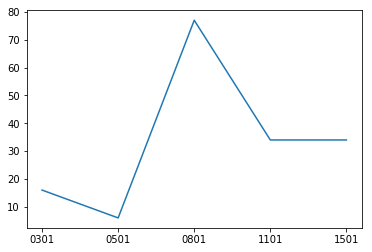

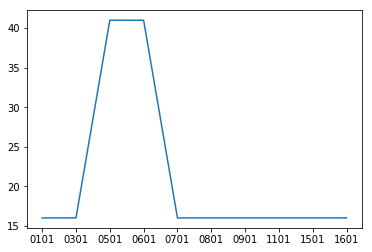

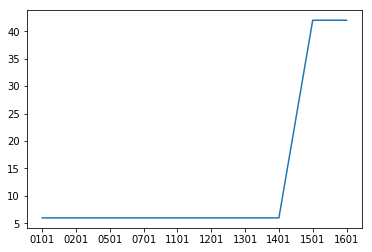

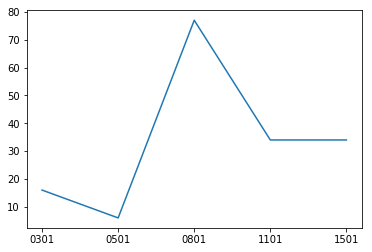

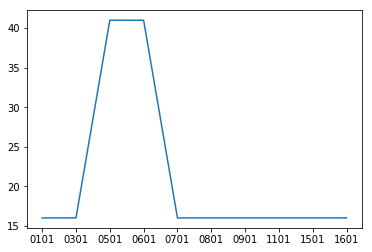

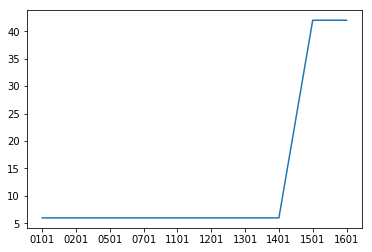

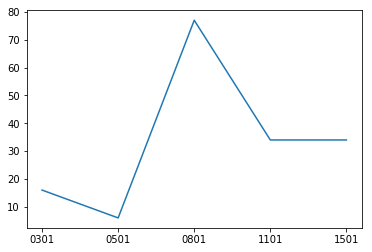

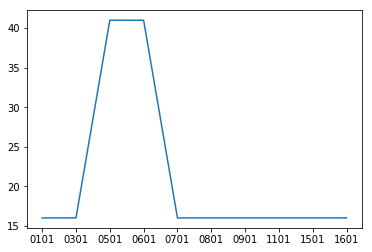

KeyboardInterrupt: 

In [54]:
for i in range(0,50):
    i = 1
    while i < 10:
        fig=plt.figure()
        plt.plot(to_plot[i+1], to_plot[i])
    
        plt.show()
        i += 3

Compare against non-refugee population

In [55]:
non_to_analyse = [] #narrow down the callerIDs to analyse based on prefix
for i in range(len(callerID)):
    if prefix[i] == 1:
        if callerID[i] not in non_to_analyse:
                non_to_analyse.append(callerID[i])

In [56]:
non_to_analyse = np.asarray(non_to_analyse)

In [57]:
assert np.unique(non_to_analyse).shape == non_to_analyse.shape

In [61]:
non_evening_location = [] #find the cities refugees are in in the evening
for i in non_to_analyse:
    location = np.where(callerID == i)
    location = np.asarray(location)
    location = location.reshape(-1)
    dates = []
    cities = []
    for j in location:
        if hours[j] >= 18 or hours[j] <= 7:
            dates.append(day_month[j])
            cities.append(cityID[j])
    non_evening_location.append(i)
    non_evening_location.append(cities)
    non_evening_location.append(dates)

In [62]:
with open("non_evening_location.txt", "wb") as fp:   #Pickling
    pickle.dump(non_evening_location, fp)

In [63]:
with open("non_evening_location.txt", "rb") as fp:   # Unpickling
    non_evening_location = pickle.load(fp)

In [64]:
non_to_plot = [] #find the refugees who spend their time in more that one city in the evening over the month
i = 1
while i < len(non_evening_location):
    unique, counts = np.unique(non_evening_location[i], return_counts=True)
    if len(unique) > 1:
        non_to_plot.append(non_evening_location[i-1])
        non_to_plot.append(non_evening_location[i])
        non_to_plot.append(non_evening_location[i+1])
    i += 3

In [76]:
print ('there are {} callers out ot 50,000 refugees who moved cities'.format(len(non_to_plot)/3))

there are 449 callers out ot 50,000 refugees who moved cities


In [77]:
print ('there are {} times as many refugees who moved cities as non-refugees'.format(
    round(float(len(to_plot))/float(len(non_to_plot)),2)))

there are 2.58 times as many refugees who moved cities as non-refugees
